In [4]:
import numpy as np
import corner
import h5py
import json
import sys
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

from pycbc.conversions import mass1_from_mchirp_q, mass2_from_mchirp_q, chi_eff
import pycbc
from matplotlib.lines import Line2D
from scipy.stats import gaussian_kde

import matplotlib.lines as mpllines
from pycbc.conversions import mass1_from_mchirp_q, mass2_from_mchirp_q
from pycbc.waveform import waveform
from pycbc.types.frequencyseries import FrequencySeries
from pycbc.conversions import mass1_from_mchirp_eta, mass2_from_mchirp_eta, mchirp_from_mass1_mass2, eta_from_mass1_mass2, q_from_mass1_mass2
#from plotting_utils import pos_samples, plot_corner_2datasets, plot_corner_3datasets, title_formats
from pycbc.cosmology import redshift


In [5]:

inject_params = {'m1_det': 7.409,  #detector frame mass_1, taken from MAP values of (mass_1) GW200115 posterior samples
                 'm2_det': 1.351,  #detector frame mass_2,taken from MAP values (mass_2) of GW200115 posterior samples 
                 'spin_1z': -0.0034, #spin_1z, taken from MAP values (spin_1z) of GW200115 posterior samples
                 'spin_2z': -0.0002, #spin_2z, taken from MAP values (spin_1z) of GW200115 posterior samples
                 'luminosity_distance': 269,   #taken from MAP values (luminosity_distance) of GW200115 posterior samples
                 'iota': 0.606,       # taken from MAP value (iota) of GW200115 posterior samples
                 'ra': 0.721,         # taken from MAP value (ra) of GW200115 posterior samples
                 'dec': -0.021,       # taken from MAP value (dec) of GW200115 posterior samples
                 'pol':0}             # taken from MAP value (psi) of GW200115 posterior samples
               #  'tc': trigTime}   # tc is taken such that it is 3 secs before end_time for L1 noise


In [6]:
params = ['Mc', 'mass_ratio', 'chi1z', 'chi2z', 'chi_eff', 'iota', 'ra', 'dec', 'z', 'dL', 'Vcom', 'pol', 'tc']

In [9]:
#-- reading the samples from posterior file

with h5py.File('../post_samples/post_samples_interp_L1H1V1_narrow_prior.hdf') as f:
    
    print(f.keys())
    
    #print(samples.keys())
    
    mchirp, q, chi_Eff = np.array(f['Mc']), np.array(f['mass_ratio']), np.array(f['chi_eff'])    
    iota, ra, dec = np.array(f['iota']), np.array(f['ra']), np.array(f['dec'])
    z, dL =  np.array(f['z']), np.array(f['dL'])
    
samps_relbin = np.column_stack((mchirp, q, chi_Eff, ra, dec, iota, dL, z))

<KeysViewHDF5 ['Mc', 'Vcom', 'chi1z', 'chi2z', 'chi_eff', 'dL', 'dec', 'iota', 'mass_ratio', 'pol', 'ra', 'tc', 'z']>


In [10]:
mchirp_center = mchirp_from_mass1_mass2(inject_params['m1_det'], inject_params['m2_det'])

mass_ratio_center = q_from_mass1_mass2(inject_params['m1_det'], inject_params['m2_det'])

chi_eff_center = chi_eff(inject_params['m1_det'], inject_params['m2_det'], inject_params['spin_1z'], inject_params['spin_2z'])

z_center = redshift(inject_params['luminosity_distance'])

In [11]:
truths = np.array([mchirp_center, mass_ratio_center, chi_eff_center, inject_params['ra'], inject_params['dec'], inject_params['iota'],\
                   inject_params['luminosity_distance'], z_center])


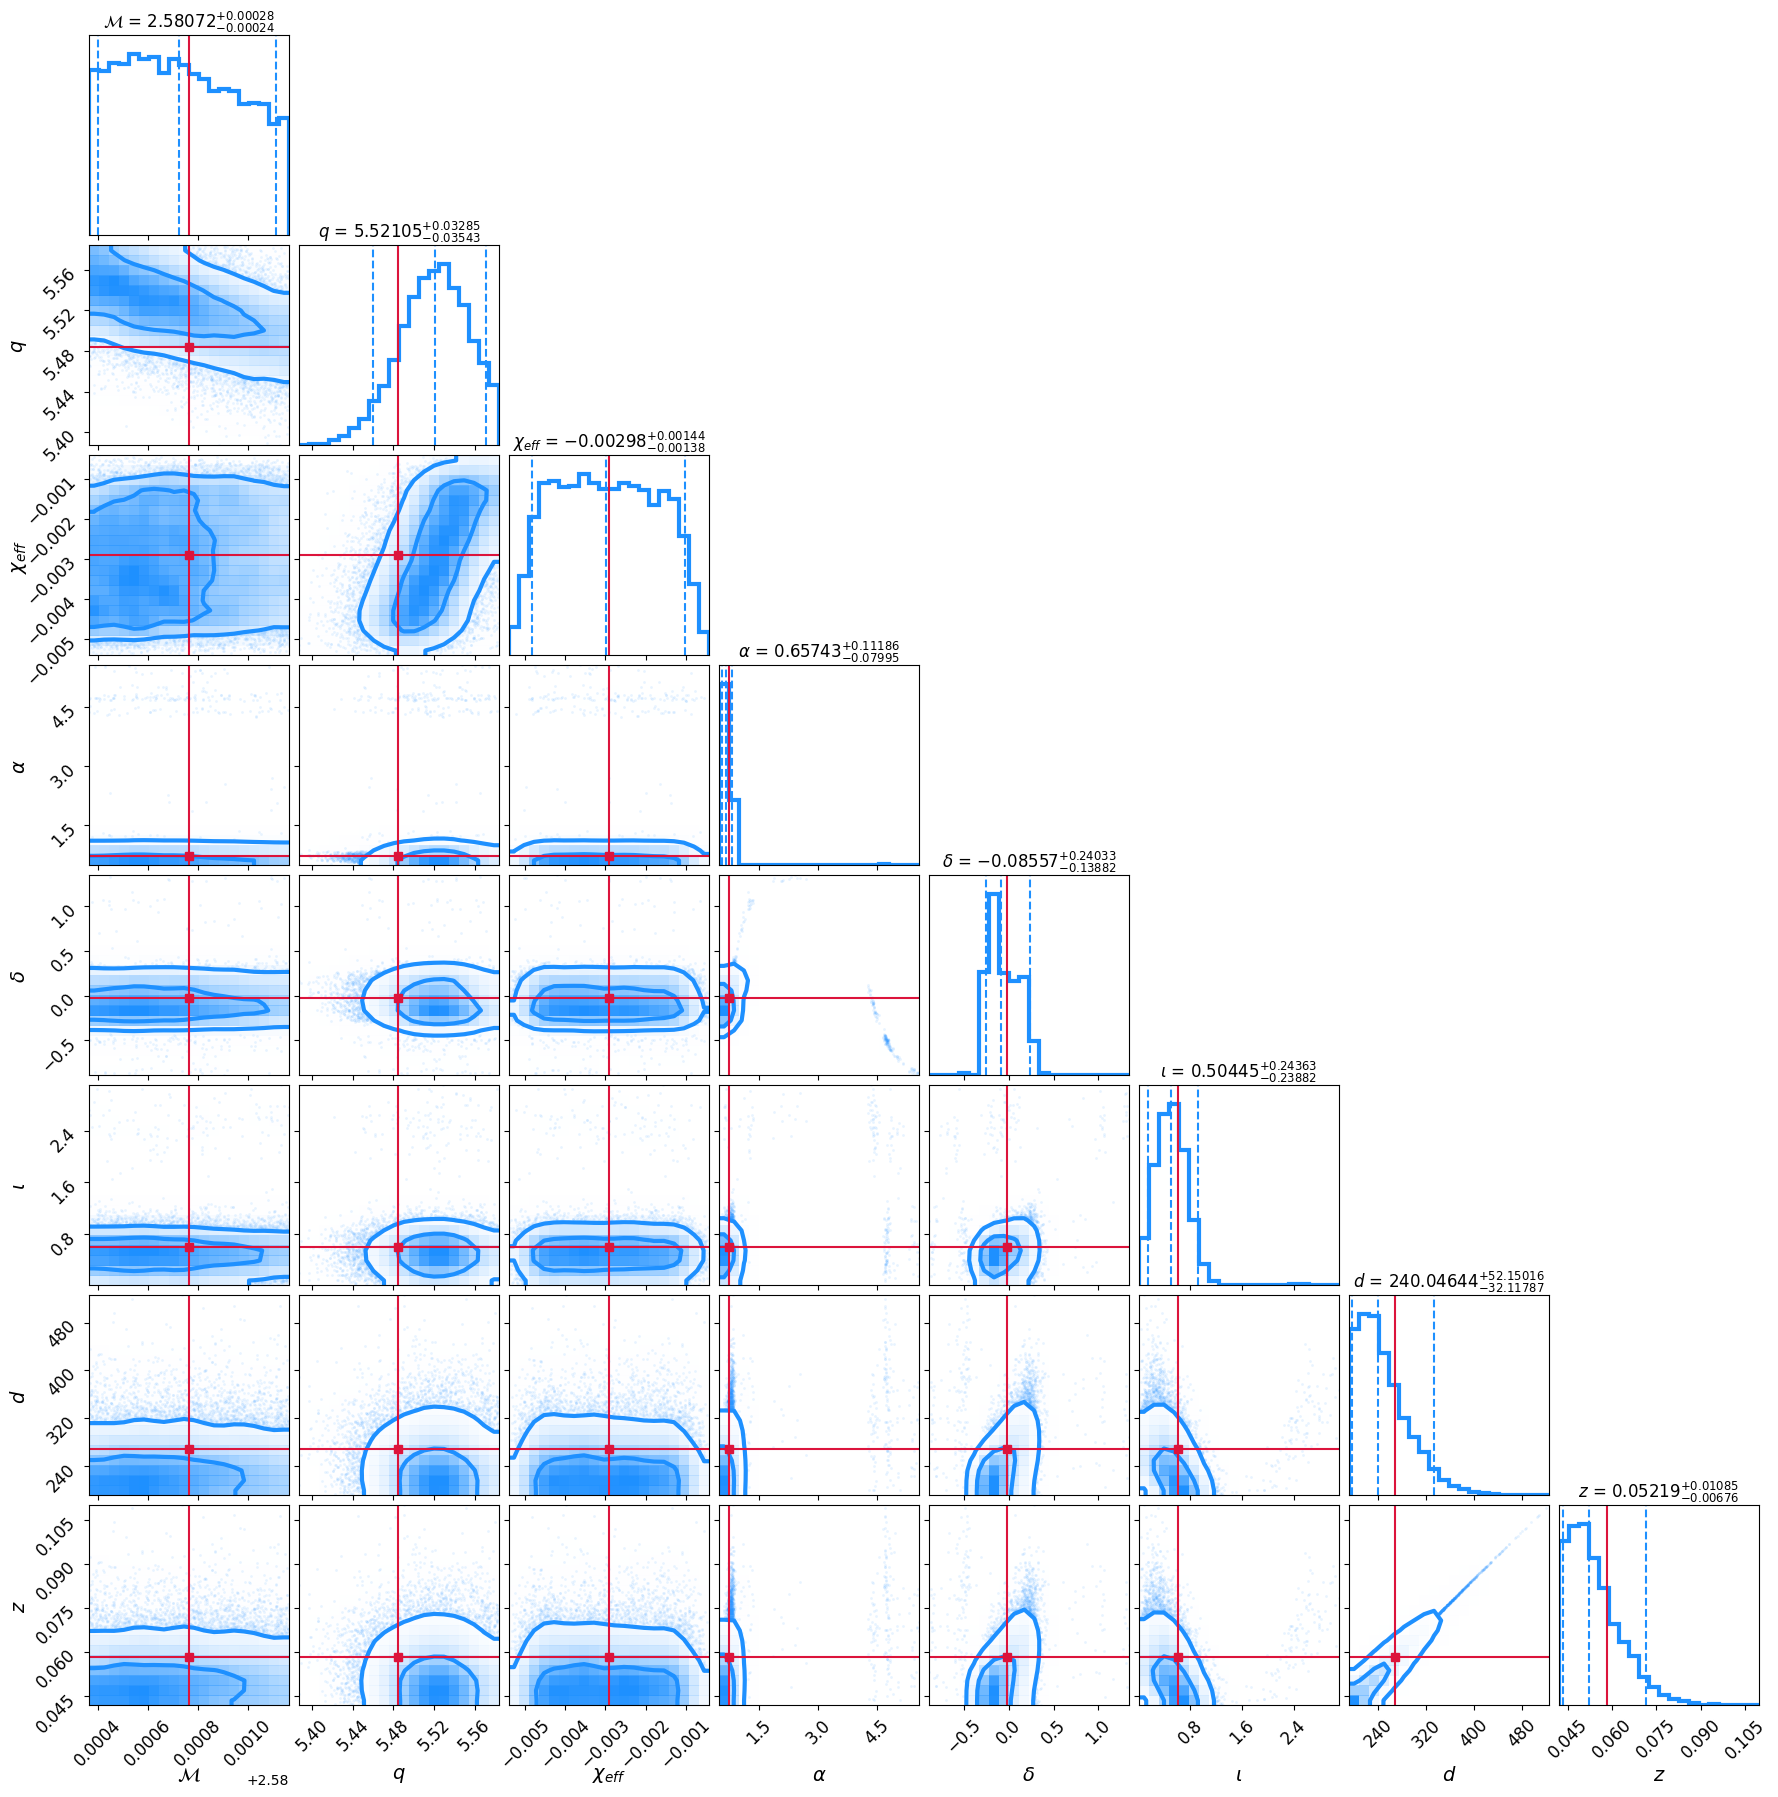

In [12]:
#-- corner plot --
fontsize = 14

labels = [r'$\mathcal{M}$', r'$q$', r'$\chi_{eff}$', r'$\alpha$', r'$\delta$', r'$\iota$', r'$d$', r'$z$']

fig = corner.corner(samps_relbin, truths=truths, color='dodgerblue', quantiles=[0.05, 0.5, 0.95], labels=labels, title_kwargs=dict(fontsize=fontsize-2), label_kwargs=dict(fontsize=fontsize), hist_kwargs=dict(lw=3), contour_kwargs=dict(linewidths=3), \
             truth_color='crimson', plot_datapoints=True, plot_density=True, show_titles=True, smooth=0.95, levels=[0.5, 0.9], title_fmt='.5f')

for ax in fig.get_axes():
    
    ax.tick_params(axis='both', labelsize=fontsize-2)
    
fig.show()